Project: Investigating Netflix Movies and Guest Stars in The Office

In [24]:
#1. Loading your friend's data into a dictionary

# Create the years and durations lists
years = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
durations = [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]

# Create a dictionary with the two lists
movie_dict = {'years': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], 'durations':[103, 101, 99, 100, 100, 95, 95, 96, 93, 90]}

# Print the dictionary
print(movie_dict)

{'years': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], 'durations': [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]}


In [25]:
#2. Creating a DataFrame from a dictionary
# Import pandas under its usual alias
import pandas as pd

# Create a DataFrame from the dictionary
durations_df = pd.DataFrame(movie_dict)

# Print the DataFrame
print(durations_df)

   years  durations
0   2011        103
1   2012        101
2   2013         99
3   2014        100
4   2015        100
5   2016         95
6   2017         95
7   2018         96
8   2019         93
9   2020         90


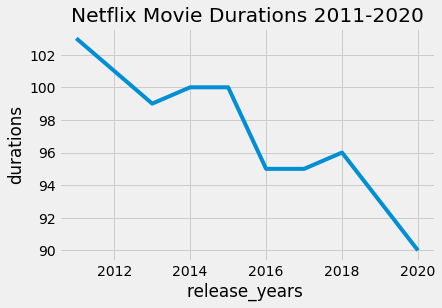

In [26]:
#3. A visual inspection of our data
# Import matplotlib.pyplot under its usual alias and create a figure
import matplotlib.pyplot as plt
fig = plt.figure()

# Draw a line plot of release_years and durations
plt.plot(durations_df['years'], durations_df['durations'])

# Create a title
plt.title('Netflix Movie Durations 2011-2020')
plt.xlabel('release_years ')
plt.ylabel('durations')
# Show the plot
plt.show()

In [27]:
#4. Loading the rest of the data from a CSV
# Read in the CSV as a DataFrame
netflix_df = pd.read_csv("/Users/jonathancheng/Downloads/netflix_data.csv")

# Print the first five rows of the DataFrame
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


In [28]:
#5. Filtering for movies!
# Subset the DataFrame for type "Movie"
netflix_df_movies_only = netflix_df[netflix_df['type'] == 'Movie']

# Select only the columns of interest
netflix_movies_col_subset = netflix_df[['title', 'country', 'genre', 'release_year', 'duration']]

# Print the first five rows of the new DataFrame
netflix_movies_col_subset[0:5]

,title,country,genre,release_year,duration
0,3%,Brazil,International TV,2020,4
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123


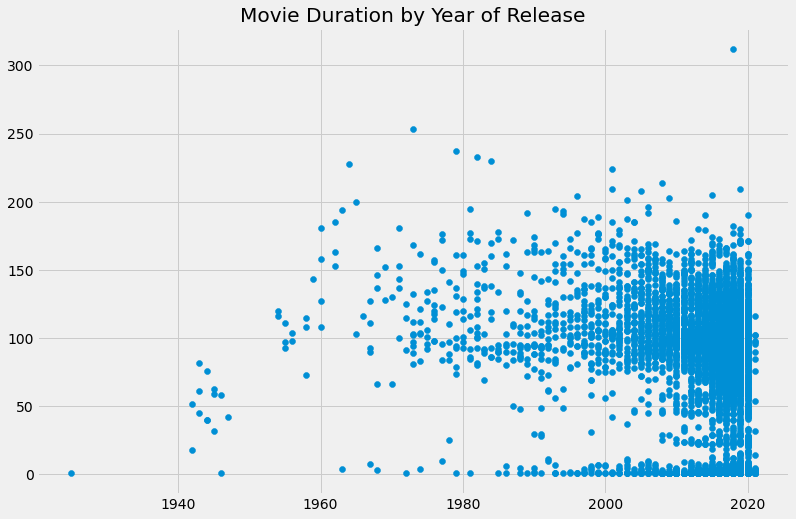

In [29]:
#6. Creating a scatter plot
# Create a figure and increase the figure size
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus year
plt.scatter(netflix_movies_col_subset['release_year'], netflix_movies_col_subset['duration'])

# Create a title
plt.title("Movie Duration by Year of Release")

# Show the plot
plt.show()

In [30]:
#7. Digging deeper
# Filter for durations shorter than 60 minutes
short_movies = netflix_movies_col_subset[netflix_movies_col_subset['duration'] < 60 ]

# Print the first 20 rows of short_movies
short_movies.head(20)


,title,country,genre,release_year,duration
0,3%,Brazil,International TV,2020,4
5,46,Turkey,International TV,2016,1
11,1983,Poland,Crime TV,2018,1
12,1994,Mexico,Crime TV,2019,1
16,Feb-09,NaN,International TV,2018,1
24,​SAINT SEIYA: Knights of the Zodiac,Japan,Anime Series,2020,2
26,(Un)Well,United States,Reality TV,2020,1
29,#blackAF,United States,TV Comedies,2020,1
35,#Rucker50,United States,Documentaries,2016,56
38,แผนร้ายนายเจ้าเล่ห์,NaN,International TV,2016,1


In [31]:
#8. Marking non-feature films
# Define an empty list
colors = []

# Iterate over rows of netflix_movies_col_subset
for lab, row in netflix_movies_col_subset.iterrows() :
    if row['genre'] == "Children" :
        colors.append("red")
        
    elif row['genre'] == "Documentaries" :
        colors.append("blue") 
        
    elif row['genre'] == "Stand-Up" :
        colors.append("green") 
        
    else:
        colors.append("black") 
        
# Inspect the first 10 values in your list        
colors[0:10]

['black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black']

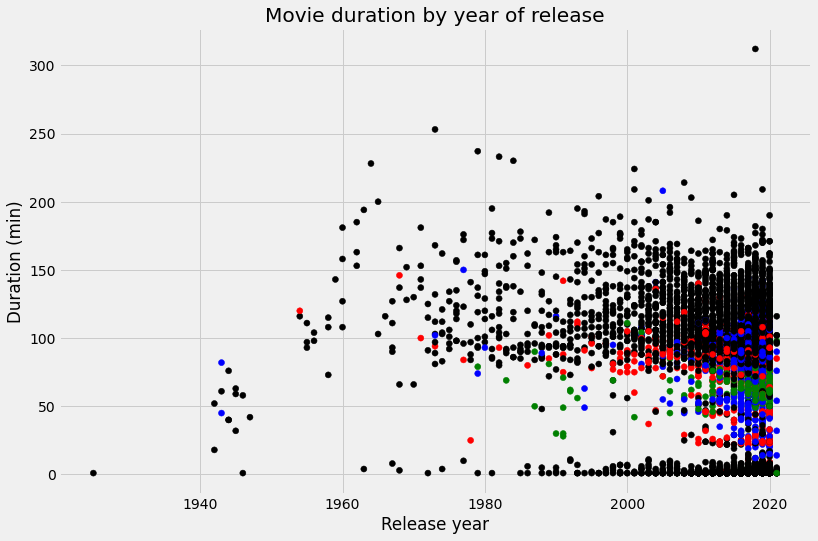

In [32]:
#9. Plotting with color!
# Set the figure style and initalize a new figure
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus release_year
plt.scatter(netflix_movies_col_subset['release_year'], netflix_movies_col_subset['duration'], c=colors)


# Create a title and axis labels
plt.title("Movie duration by year of release")
plt.xlabel("Release year")
plt.ylabel("Duration (min)")
# Show the plot
plt.show()


In [33]:
#10. What next?
# Are we certain that movies are getting shorter?
are_movies_getting_shorter = "Sure"